# Практическое задание 2
## Вариант 7
## Задание 1 

Рассмотрим данные:

|       | x<sub>1</sub> | x<sub>2</sub> | x<sub>3</sub> | x<sub>4</sub> | x<sub>5</sub> | x<sub>6</sub> | x<sub>7</sub> | x<sub>8</sub> |
| :---: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: |
| **A** |      1.9       |      2.9       |      1.4       |      -1.4       |      2      |      -1.4      |      -2.9      |      2      |
| **B** |      -5       |      -6.4       |      -1.5       |      -1.3       |      -6.3      |      -0.4      |      -3.1      |      -5.8      |

Есть ядро (функция сходства):
$$
K({\bf x}_i,{\bf x}_j)=||{\bf x}_i-{\bf x}_j||^2\\
$$

1. Построить диаграмму рассеяния точек **x<sub>i</sub>** (оси подписать, пронумеровать точки)

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as sts
import math

In [2]:
A=np.array([1.9,2.9,1.4,-1.4,2.0,-1.4,-2.9,2.0])
B=np.array([-5.0,-6.4,-1.5,-1.3,-6.3,-0.4,-3.1,-5.8])
matrix = np.transpose([A,B])
C=[1,2,3,4,5,6,7,8]

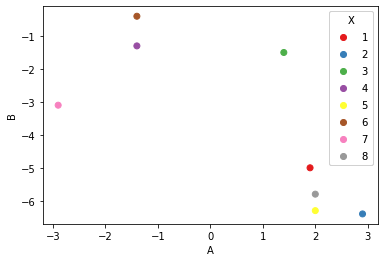

In [3]:
fig, axs = plt.subplots()
scatter = axs.scatter(A,B,c=C,cmap='Set1')
legend = axs.legend(*scatter.legend_elements(),loc="upper right", title="X")
axs.set_xlabel('A')
axs.set_ylabel('B')
axs.add_artist(legend)
plt.show()

2. Рассчитать ядерную матрицу

In [4]:
from scipy.spatial.distance import squareform, pdist
K=squareform(pdist(matrix))**2
K

array([[ 0.  ,  2.96, 12.5 , 24.58,  1.7 , 32.05, 26.65,  0.65],
       [ 2.96,  0.  , 26.26, 44.5 ,  0.82, 54.49, 44.53,  1.17],
       [12.5 , 26.26,  0.  ,  7.88, 23.4 ,  9.05, 21.05, 18.85],
       [24.58, 44.5 ,  7.88,  0.  , 36.56,  0.81,  5.49, 31.81],
       [ 1.7 ,  0.82, 23.4 , 36.56,  0.  , 46.37, 34.25,  0.25],
       [32.05, 54.49,  9.05,  0.81, 46.37,  0.  ,  9.54, 40.72],
       [26.65, 44.53, 21.05,  5.49, 34.25,  9.54,  0.  , 31.3 ],
       [ 0.65,  1.17, 18.85, 31.81,  0.25, 40.72, 31.3 ,  0.  ]])

## Задание 2
Рассмотрим данные в виде матрицы **D**:

| ***X<sub>1</sub>*** | ***X<sub>2</sub>*** |
| :-----------------: | :-----------------: |
|         -46         |         -19         |
|         -72         |         132         |
|         -27         |         73         |
|         3         |         64         |
|         -50         |         145         |
|         -37         |         202         |
|         -49         |         9         |
|         -47         |         37         |

1. Построить диаграмму рассеяния (оси подписать, пронумеровать точки)

In [5]:
X1=np.array([-46,-72,-27,3,-50,-37,-49,-47])
X2=np.array([-19,132,73,64,145,202,9,37])

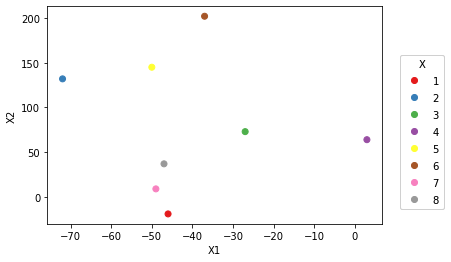

In [6]:
fig, axs = plt.subplots()
scatter = axs.scatter(X1,X2,c=C,cmap='Set1')
legend = axs.legend(*scatter.legend_elements(), title="X",bbox_to_anchor=(1.2, 0.8))
axs.set_xlabel('X1')
axs.set_ylabel('X2')
axs.add_artist(legend)
plt.show()


2. Рассчитайте среднее **μ** для матрицы **D**, ковариационную матрицу **Σ** для матрицы **D** и ковариационную матрицу **Σ<sub>c</sub>**  для центрированной матрицы **D**

In [7]:
X = np.vstack((X1,X2))
Xcentered = (X[0] - X1.mean(), X[1] - X2.mean())
m = (X1.mean(), X2.mean())
print(Xcentered)
print('Mean vector: ', m)

(array([ -5.375, -31.375,  13.625,  43.625,  -9.375,   3.625,  -8.375,
        -6.375]), array([-99.375,  51.625,  -7.375, -16.375,  64.625, 121.625, -71.375,
       -43.375]))
Mean vector:  (-40.625, 80.375)


In [8]:
Σ = np.cov(X)
print('Σ ',Σ)
Σc=np.cov(Xcentered)
print('\nΣc ',Σc)

Σ  [[ 473.41071429 -170.16071429]
 [-170.16071429 5543.98214286]]

Σc  [[ 473.41071429 -170.16071429]
 [-170.16071429 5543.98214286]]



3. Рассчитайте собственные числа и собственные вектора для матрицы **Σ<sub>c</sub>**

In [9]:
from numpy import linalg as LA
w,v = LA.eig(Σc)
print('Собственные числа ',w)
print('Собственные векторы ',v)

Собственные числа  [ 467.70679425 5549.6860629 ]
Собственные векторы  [[-0.99943865  0.03350196]
 [-0.03350196 -0.99943865]]


4. Выведите индекс (порядковый номер), соответствующий первой главной компоненте

In [10]:
print('Индекс первого главного компонента: ', np.argmax(w))

Индекс первого главного компонента:  1


    Т.е. 2 порядковый номер, так как большее собственное число представляет величину дисперсии, соответствующую первой главной оси.

5. Рассчитайте первый главный компонент. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)

In [11]:
Xnew = np.dot(-v[:,1],Xcentered)
print(Xnew)

[-99.13914295  52.64714452  -7.82732432 -17.82733111  64.90280378
 121.43528139 -71.05435481 -43.13707649]


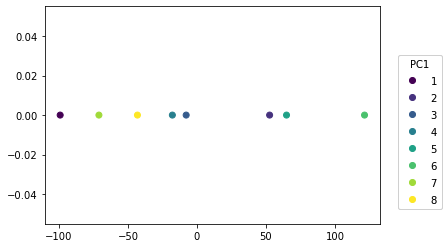

In [12]:
y=[0]*8
fig, axs = plt.subplots()
scatter = axs.scatter(Xnew,y,c=C)
legend = axs.legend(*scatter.legend_elements(), title="PC1",bbox_to_anchor=(1.2, 0.8))
axs.add_artist(legend)
plt.show()

6. Используя PCA из библиотеки sklearn, получите первую главную компоненту для матрицы **D**. Постройте точечный график полученного вектора (пронумеровать точки)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(X))
print('PC1:\n',XPCAreduced)

PC1:
 [[-99.13914295]
 [ 52.64714452]
 [ -7.82732432]
 [-17.82733111]
 [ 64.90280378]
 [121.43528139]
 [-71.05435481]
 [-43.13707649]]


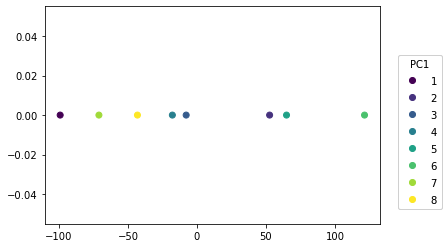

In [14]:
fig, axs = plt.subplots()
scatter = axs.scatter(XPCAreduced,y,c=C)
legend = axs.legend(*scatter.legend_elements(), title="PC1",bbox_to_anchor=(1.2, 0.8))
axs.add_artist(legend)
plt.show()

7. Визуально сравните графики, полученные в пунктах **5** и **6**. Убедитесь в корректности выполнения преобразований. Сохранен ли порядок точек? 

    Порядок точен сохранен, значения совпадают, преобразования выполнены корректно

Выведите название оси графика из пункта 1, проекция данных на которую сравнима с результатами PCA преобразований

In [15]:
print('Дисперсия X1 =', np.var(X1))
print('Дисперсия X2 =', np.var(X2))
print('Дисперсия PC1 =', np.var(XPCAreduced))

Дисперсия X1 = 414.234375
Дисперсия X2 = 4850.984375
Дисперсия PC1 = 4855.975305034437


Проекция данных на ось <b>X2</b> сравнима с результатами PCA преобразований.

8. **μ** и **Σ** сверху задают нормальное распределение, из которого были сгенерированы точки. Постройте диаграмму рассеяния, которая позволит определить ориентацию / размеры облака точек, полученного с помощью 2-мерной функции плотности вероятности. 


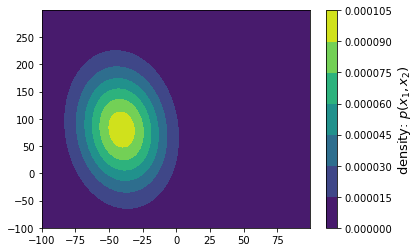

In [16]:
s1 = math.sqrt(Σ[0,0])
s2 =  math.sqrt(Σ[1,1])
x, y = np.mgrid[-100:100, -100:300]
pos = np.dstack((x, y))
rv = sts.multivariate_normal(m, Σ)
fig = plt.figure()
ax = fig.add_subplot()
cset= ax.contourf(x, y, rv.pdf(pos))
cbar = plt.colorbar(cset)
cbar.ax.set_ylabel('density: $p(x_1, x_2)$', fontsize=13)
plt.show()

 На отдельном линейном графике постройте графики функций плотностей вероятности отдельных компонентов 2-мерного нормального распределения

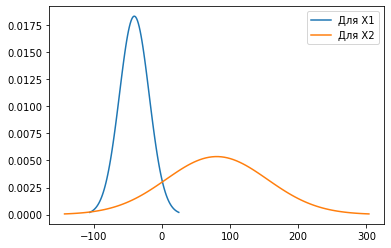

In [17]:
x1 = np.linspace(m[0] - 3*s1, m[0] + 3*s1, 100)
x2 = np.linspace(m[1] - 3*s2, m[1] + 3*s2, 100)
fx1 = sts.norm.pdf(x1,m[0],s1)
fx2 = sts.norm.pdf(x2,m[1],s2)
plt.plot(x1, fx1,label= 'Для X1')
plt.plot(x2, fx2,label= 'Для X2')
plt.legend()

### Задание 3

1. Для данных и ядра из первого задания найдите первую главную компоненту при нелинейном преобразовании для заданного ядра. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)

In [18]:
N = K.shape[0]
one_n = np.ones((N,N)) / N
KCentered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)    
eig_vals, eig_vecs = LA.eig(KCentered)
eig_vals, eig_vecs = eig_vals[::-1], eig_vecs[:, ::-1] 
eig_vecs = np.vstack([eig_vecs[:, i] for i in range(1)])   
my_kpca = np.dot(eig_vecs,KCentered).real
print('PC1:\n',my_kpca)

PC1:
 [[-4.21884749e-15 -7.99360578e-15  4.32986980e-15  1.13242749e-14
  -9.54791801e-15  1.64313008e-14  5.99520433e-15 -1.24344979e-14]]


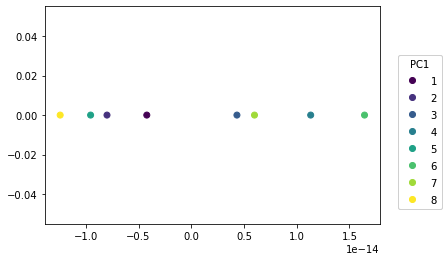

In [19]:
y=[0]*8
fig, axs = plt.subplots()
scatter = axs.scatter(my_kpca,y,c=C)
legend = axs.legend(*scatter.legend_elements(),bbox_to_anchor=(1.2, 0.8), title="PC1",)
axs.add_artist(legend)
plt.show()

2. Используя KernelPCA из библиотеки sklearn с ядром Гаусса и гаммой = 1, получите первую главную компоненту для данных из первого задания. Постройте точечный график полученного вектора (добавить к каждой точке ее номер)

In [20]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf', n_components=1, gamma =1)
kpca_transform = kpca.fit_transform(matrix)
print('PC1:\n',kpca_transform)

PC1:
 [[-0.28743084]
 [-0.30960593]
 [ 0.26910272]
 [ 0.61903235]
 [-0.5723228 ]
 [ 0.61808082]
 [ 0.27201261]
 [-0.60886894]]


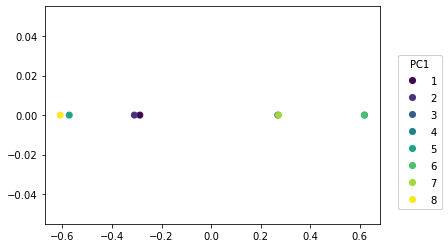

In [21]:
fig, axs = plt.subplots()
scatter = axs.scatter(kpca_transform,y,c=C)
legend = axs.legend(*scatter.legend_elements(),bbox_to_anchor=(1.2, 0.8), title="PC1")
axs.add_artist(legend)
plt.show()

3. Визуально сравните графики, полученные в пунктах **1** и **2**. Определите, использование какого ядра (из первого задания или ядра Гаусса) позволяет, на ваш взгляд, лучше визуально выделить принадлежность точки к одному из двух кластеров

    Использование Гауссово ядра позволяет визуально лучше оценить принадлежность точки к определенному кластеру, чем ядро заданное в 1 задании